In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
# Define dataset paths
data_dir = "/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
validation_dir = os.path.join(data_dir, "validation")

In [12]:
# Image Preprocessing and Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2,
                                  height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True,
                                  fill_mode = 'nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Define batch size
batch_size = 32
img_size = (150,150)

In [14]:
# Load Datasets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size = batch_size, class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = img_size , batch_size = batch_size, class_mode = 'binary')
test_generator = validation_datagen.flow_from_directory(test_dir,target_size = img_size, batch_size = batch_size, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 779 images belonging to 2 classes.


Model training from Scratch

In [15]:
def conv_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation = 'relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation = 'relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (2,2), activation = 'relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [16]:
# train model from scratch
scratch_model = conv_model()
model_scratch = scratch_model.fit(train_generator, epochs = 30, validation_data = validation_generator)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5291 - loss: 0.7117 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.5029 - loss: 0.6968 - val_accuracy: 0.5630 - val_loss: 0.6852
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.5356 - loss: 0.6885 - val_accuracy: 0.5410 - val_loss: 0.6713
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.5775 - loss: 0.6764 - val_accuracy: 0.5700 - val_loss: 0.6833
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.5780 - loss: 0.6788 - val_accuracy: 0.6550 - val_loss: 0.6160
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6131 - loss: 0.6645 - val_accuracy: 0.6510 - val_loss: 0.6231
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.6473 - loss: 0.6381 - val_accuracy: 0.6450 - val_loss: 0.6134
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.6541 - loss: 0.6388 - val_accuracy: 0.6570 - v

In [17]:
scratch_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,062,725 (49.83 MB)

 Trainable params: 4,354,241 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,708,484 (33.22 MB)

In [18]:
def plot_result(history, title):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label = 'Train Accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label = 'Train Loss')
    plt.plot(history.history['val_loss'], label = 'Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

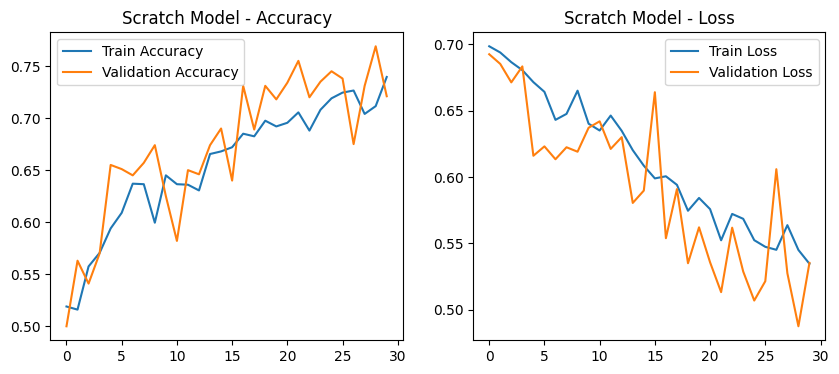

In [19]:
plot_result(model_scratch, "Scratch Model")

In [20]:
# evaluate on test set
test_loss_scratch, test_acc_scratch = scratch_model.evaluate(test_generator)
print(f"Test Accuracy (Scratch Model): {test_acc_scratch:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 160s 6s/step - accuracy: 0.7667 - loss: 0.5207
Test Accuracy (Scratch Model): 0.7574


In [21]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size = (150,150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    img_array = img_array/255.0
    return img_array

In [22]:
def predict_image(model, img_path):
    img_array = prepare_image(img_path)
    prediction = model.predict(img_array)
    print("Prediction (0 = cat, 1 = dog):", prediction)


    img = image.load_img(img_path, target_size = (150, 150))
    plt.imshow(img)
    plt.show()


    if prediction[0]<0.5:
        print("It's a cat!")

    else:
        print("It's a dog!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Prediction (0 = cat, 1 = dog): [[0.91958857]]


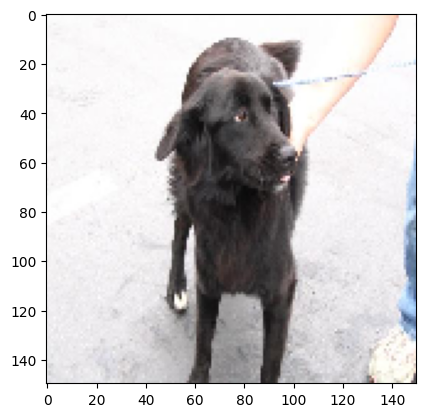

It's a dog!


In [23]:
img_path = '/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small/test/dogs/1549.jpg'
predict_image(scratch_model, img_path)

#### Pretrained model

In [24]:
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
model_vgg16 = models.Sequential([base_model,
                                 layers.Flatten(),
                                 layers.Dense(256, activation = 'relu'),
                                 layers.Dropout(0.5),
                                 layers.Dense(1,activation = 'sigmoid')
                                ])

In [26]:
model_vgg16.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history_vgg16 = model_vgg16.fit(train_generator, epochs = 30, validation_data = validation_generator)

Epoch 1/30
61/63 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step - accuracy: 0.8512 - loss: 0.3293

In [ ]:
plot_result(history_vgg16, 'VGG16 Pretrained model')

In [29]:
test_loss_vgg16 ,test_acc_vgg16 = model_vgg16.evaluate(test_generator)
print(f"Test Accuracy (VGG16 Model): {test_acc_vgg16:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 185s 7s/step - accuracy: 0.8931 - loss: 0.2300
Test Accuracy (VGG16 Model): 0.8870


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
Prediction (0 = cat, 1 = dog): [[0.99980295]]


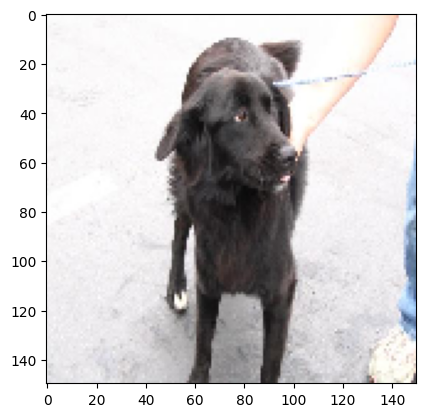

It's a dog!


In [30]:
img_path = '/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small/test/dogs/1549.jpg'
predict_image(model_vgg16, img_path)

In [31]:
# Create a comparison table
comparison_data = {
    "Model": ["Scratch Model", "VGG16 Pretrained Model"],
    "Test Accuracy": [test_acc_scratch, test_acc_vgg16],
    "Test Loss": [test_loss_scratch, test_loss_vgg16]
}

In [32]:
import pandas as pd
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

NameError: name 'pd' is not defined

When evaluating loss and accuracy criteria, the Scratch Model and the VGG16 Model reveal somewhat different performance gaps.  Starting fresh, the Scratch Model attained a 75.74% accuracy and a test loss of 0.5207.  Both the training and validation accuracy curves show obvious ups and downs; the validation curve shows more severe swings that would suggest either overfitting or learning instability.  Complementing this with different validation loss settings, the related loss curve indicates that the model finds it difficult to stretch to fresh data.

Using pretrained weights and transfer learning lowers test loss of 0.2300 much and improves performance with a test accuracy of 88.70%. Excellent feature extraction capacity of VGG16—achieved by means of strict ImageNet dataset training—allows one to attribute this great advance. Comparatively to the others, based on evaluation the VGG16 model learns fresh data faster and more precisely. Image prediction generates rather strong confidence in the classification.

Confirming the effectiveness of transfer learning in settings with limited data and computational capacity, the VGG16 model much surpasses the Scratch Model. This highlights the need of pretrained networks in reaching considerable accuracy by lowering training time and hence improving generalizability.